# Вступ до класифікації

 "The Regression Analysis of Binary Sequences"  --  David Roxbee Cox

https://towardsdatascience.com/are-you-interpreting-your-logistic-regression-correctly-d041f7acf8c7

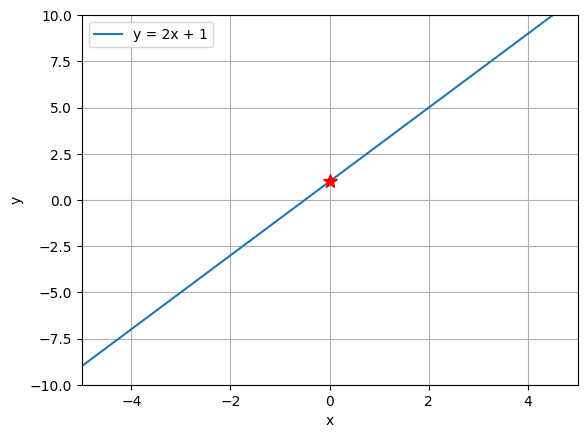

In [1]:
# Лінійна регресія
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6)
w_1 = 2
w_0 = 1
y = w_1 * x + w_0

plt.plot(x, y, label=f'y = {w_1}x + {w_0}')
plt.plot([0], [w_0], 'r*', markersize=10)

plt.ylabel('y')
plt.xlabel('x')
plt.ylim(-10, 10)
plt.xlim(-5, 5)

plt.grid()
plt.legend()

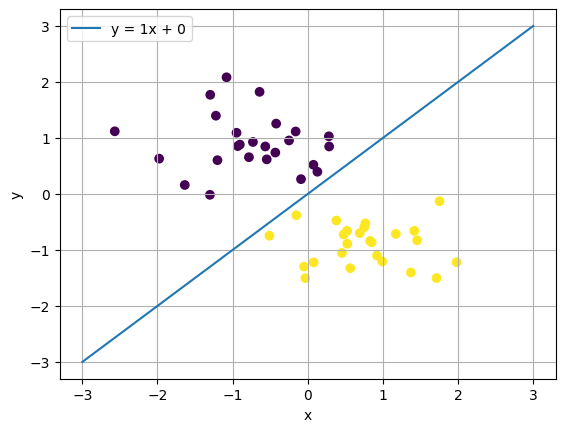

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=50, n_features=2, random_state=12, centers=2)
scaler = StandardScaler()

X = scaler.fit_transform(X)
a = 1#-0.5
b = 0

plt.scatter(X[:, 0], X[:, 1], c=y)

x_dec_bound = np.arange(-3, 4)
plt.plot(x_dec_bound, a * x_dec_bound + b, label=f'y = {a}x + {b}')

plt.ylabel('y')
plt.xlabel('x')

plt.grid()
plt.legend()

#  Бінарна класифікація. Математична реалізація

## Гіпотеза

Можемо знайти таку пряму, яка буде оптимально розділяти на 2 класи, тобто побудувати **межу вибору**, чи **decision boundary**.Оскільки ця межа є прямою лінією, тому наш класифікатор і називається лінійним. Напишемо формулу цієї прямої:
$$ w_0 + w_1x_1+w_2x_2 = 0$$
Якщо ми введемо аналогічно як і лінейною регресією введемо  $x_0$ = 1, тоді ми можемо відтворити рівняння у векторному вигляді за допомогою ветора ознак і вектора вагів.
$$ w_0x_0 + w_1x_1+w_2x2 = 0$$
$$ \vec{x} = (1, x_1, x_2)$$
$$ \vec{w} = (w_0, w_1, w_2)$$
Фінальний вигляд:
$$ \vec{x}\cdot \vec{w} = 0$$
Тоді для любого приклада (рядка) з нашого датасету, якщо він буде вище лінії, тоді це клас 1 (додатнє число), якщо нижче то це клас 2 (від'ємне число).
$$z=
\begin{cases}
y = \vec{w}\cdot \vec{x} > 0, клас 1
  \\
y = \vec{w}\cdot \vec{x} < 0, клас 2
\end{cases}
$$



Інше питання, це коли потрібно порівняти на скільки зхож елемент з іншим класом. Тоді до гіпотези потрібно застосувати функцію яка трансформує $z$ у фікосваний діапазон. Таких функцій декілька  **сігмоїда(sigm)**, **гіперболічний тангенс (tanh)**, **Rectified Linear Unit (ReLU)**, **Leaky ReLU**, **Parametric ReLU (PReLU)**, **Scaled Exponential Linear Unit (SELU)**.
Для нашої задачі потрібно використати сігмоїду, воно розділяє дані у діапазоні від 0 до 1.

$$ σ(z) =  g(z) = 1/ (1 + e^{-z}) $$

Тепер фінальний вигляд ношої гіпотези виглядає так

$$y = h(x) = 1/ (1 + e^{-\vec{w}\cdot \vec{x}}) $$

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)

In [4]:
import numpy as np

def sigmoid(X, weights):
  z = X.dot(weights)
  return 1 / (1 + np.exp(-z))

## Функція втрат (logloss)

Щоб оцінити як працює наш класифікатор, потрібно перемножити ймовірності кожного приклада до всіх класів. Для двох класів це:
$$p(1,2) = p(1)\cdot p(2) $$

Ймовірність позитивного класа: $p_+ = \hat{y}$

Ймовірність неготивного класа: $p_- = 1 - \hat{y}$

Загальна ймовірність того, що модель робить правильні прогнози:

$$P(X) = \prod_{i=1}^{m+} \hat{y}^{(i)}\prod_{i=1}^{m-} (1- \hat{y}^{(i)}) → max$$

де $m_+$​ - кількість позитивних прикладів,

а $m_-$- негативних,

$m_+ + m_- = m$

Добуток ймовірностей є дуже маленьким числом, і чим більше у нас прикладів у датасеті, то цей добуток буде ще меншим, хоча це ніяк не повинно впливати на якість моделі. Тому, щоб змінити добуток на суму, ми скористаємось логарифмом - оскільки логарифм від добутку, є сумою логарифмів.


$$ \log_a{bc} = \log_a{b} + \log_a{c}$$

$$ln(P(X))=\sum_{i=1}^{m+} ln(\hat{y}^{(i)}) + \sum_{i=1}^{m-} ln(1- \hat{y}^{(i)})→ max$$

З урахуванням того, що нам краще знаходити мінімум функції і ми можемо згадати, що класи всі записи належать до класів 0 та 1, то перепишемо у вигляд:

$$log loss =J(\vec{w}) =  ln(P(X))=(-1/m) \sum_{i=1}^{m} (y^{(i)}ln(\hat{y}^{(i)}) + (1- y^{(i)})ln(1- \hat{y}^{(i)}))→ min$$

In [5]:
def logloss(y, X, weights, epsilon=1e-30):
  y_proba = sigmoid(X.dot(weights))
  logloss_1 = np.sum(np.log(y_proba[y == 1] + epsilon))
  logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + epsilon))
  logloss_total = -(logloss_0 + logloss_1) / y.shape[0]
  return logloss_total

## Оптимізація

Тепер знаючи функцію втрат нашої моделі, ми можемо застосувати метод градієнтного спуску, щоб знайти такий вектор вагів, що відповідає найкращій гіпотезі. Нам потрібно порахувати градієнти для функції помилки. Спочатку порахуємо похідну для сігмоїди:

$$ σ(z) d/dz = 1 / (1 + e^{-z})d/dz = e^{-z} / (1 + e^{-z})^2 =σ(z)\cdot (1 - σ(z)) $$

Якщо порахувати похідну для гіпотези і написати у векторному вигляді, то звичайним кроком навчання, буде звичайна ітераація градієтного спуску:

$$ \vec{w} = \vec{w}^{prev} - α (X^T(σ(X\vec{w}^{prev})- \vec{y}))/m$$



## Мануальна реалізація

In [6]:
import numpy as np


class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000, reg_strength = 0.01, tol=1e-4, seed = 8, loss_history = None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.tol = tol
        self.weights = None
        self.seed = seed
        self.reg_strength = reg_strength
        self.loss_history = loss_history

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def l2_regularization(self):
        return self.reg_strength * np.sum(self.weights**2)

    def gr_l2_regularization(self):
      return 2 * self.reg_strength * self.weights

    def logloss(self, y, y_proba, epsilon=1e-30):
        logloss_1 = np.sum(np.log(y_proba[y == 1] + epsilon))
        logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + epsilon))
        logloss_total = -(logloss_0 + logloss_1) / y.shape[0]
        return logloss_total #+ self.l2_regularization()

    def gr_logloss(self, X, y):
        y_proba = self.sigmoid(X.dot(self.weights))
        grad = X.T.dot(y_proba - y) #+ self.gr_l2_regularization()
        return grad

    def fit(self, X, y):
        np.random.seed(self.seed)
        m, n = X.shape
        self.weights = np.random.randn(n)
        loss = self.logloss(y, self.sigmoid(X.dot(self.weights)))
        self.loss_history = [loss]

        for i in range(self.num_iterations):
            # Compute gradient
            grad = self.gr_logloss(X, y)
            # Update weights
            self.weights -= self.learning_rate * grad
            # Compute loss for convergence check
            loss = self.logloss(y, self.sigmoid(X.dot(self.weights)))
            # Check tolerancy
            if np.linalg.norm(self.loss_history[-1] - loss) < self.tol:
                print(f'Tol less than limit value {np.linalg.norm(self.loss_history[-1] - loss)} < {self.tol}')
                break
            self.loss_history.append(loss)

            if i % 50 == 0:
                print(f"Iteration: {i}")
                y_proba = self.sigmoid(X.dot(self.weights))
                y_class = np.where(y_proba >= 0.5, 1, 0)
                accuracy = (y_class == y).sum() / len(y)
                print(f"Logloss {self.logloss(y, y_proba)}")
                print(f"Accuracy {accuracy}")
                print("--------------------------------------------------------")

    def predict_proba(self, X):
        z = X.dot(self.weights)
        return self.sigmoid(z)

    def predict(self, X):
      return np.round(self.predict_proba(X))

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

SEED = 42
# One-class data
#X, y = make_classification(n_samples=1000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=SEED)

# Two-class data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=SEED)

X = np.c_[np.ones_like(X[:,0]), X] # intercept Xo
print(X[0:5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

[[ 1.         -0.99910178 -0.66386   ]
 [ 1.          1.24668618  1.15359685]
 [ 1.          0.96277683  0.85939747]
 [ 1.         -2.95744095  2.03364529]
 [ 1.          1.14116527  1.05944863]]


In [11]:
from sklearn.metrics import accuracy_score

model_manual = LogisticRegressionSGD(learning_rate=0.001,
                                     num_iterations=1000,
                                     tol=0.0001,
                                     seed = SEED)
model_manual.fit(X_train, y_train)
y_pred_manual = model_manual.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_manual)
print(f"Accuracy: {accuracy}")

Iteration: 0
Logloss 0.43734700784988023
Accuracy 0.85125
--------------------------------------------------------
Tol less than limit value 9.08636026044074e-05 < 0.0001
Accuracy: 0.88


In [12]:
len(model_manual.loss_history)

31

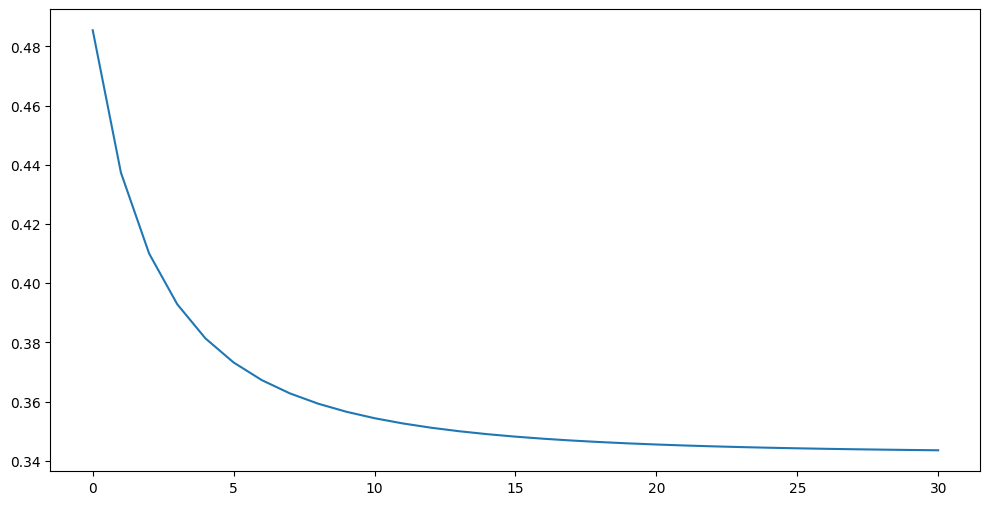

In [13]:
# Крива навчання
plt.figure(figsize = (12,6))
plt.plot(model_manual.loss_history)

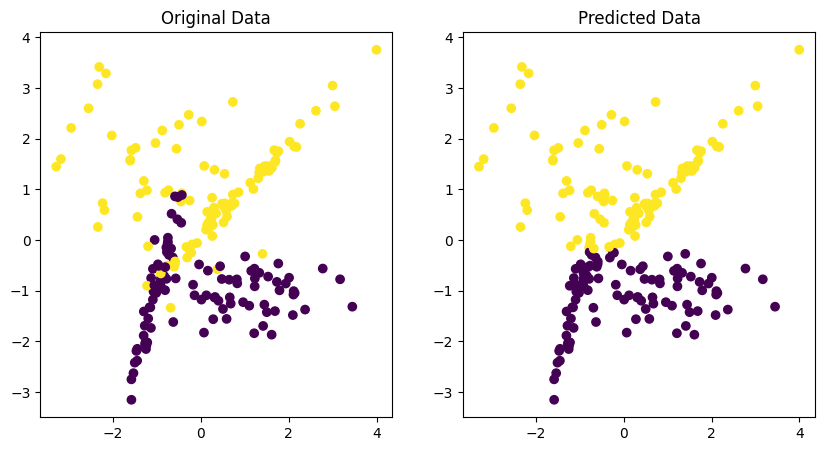

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].scatter(X_test[:, 1], X_test[:, 2], c = y_test)
ax[0].set_title('Original Data')
ax[1].scatter(X_test[:, 1], X_test[:, 2], c = y_pred_manual)
ax[1].set_title('Predicted Data')
plt.show()

## sklearn реалізація

In [15]:
# Sklearn realization
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

model_sklearn = SGDClassifier(loss = 'log_loss',
                              max_iter = 1000,
                              tol = 0.0001,
                              learning_rate = 'constant',
                              eta0 = 0.001, # learning_rate
                              )
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy (sklearn): {accuracy_sklearn}")

Accuracy (sklearn): 0.88


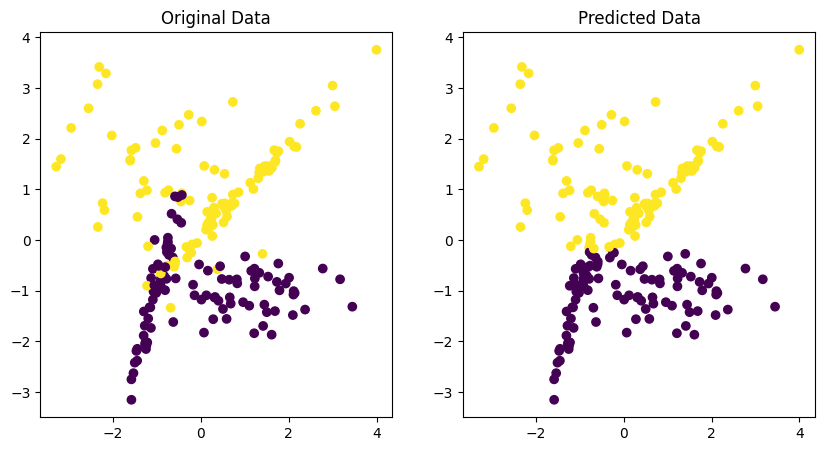

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].scatter(X_test[:, 1], X_test[:, 2], c = y_test)
ax[0].set_title('Original Data')
ax[1].scatter(X_test[:, 1], X_test[:, 2], c = y_pred_sklearn)
ax[1].set_title('Predicted Data')
plt.show()

# Мультикласова класифікація

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*jYJTPZSbe2IAGQzSV0zDhw.png)

## Стратегія "один проти всіх" (OneVsRestClassifier)

![alt text](https://miro.medium.com/v2/resize:fit:700/1*4Ii3aorSLU50RV6V5xalzg.png)

In [17]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=0)

clf = OneVsRestClassifier(SGDClassifier()).fit(X_train, y_train)


print(clf.decision_function(X_test[:5]))
print(clf.predict(X_test[:5]))
y_test_pred = clf.predict(X_test)

[[-180.74999387 -183.54707449  239.72092928]
 [-104.88183613   42.1075298  -148.94230201]
 [ 114.48249583 -178.2513993  -873.19207466]
 [-213.71055891  -31.97308214  183.0673979 ]
 [  78.81445581 -100.46381471 -723.41941628]]
[2 1 0 2 0]


In [21]:
X_df, y_df = load_iris(return_X_y=True, as_frame = True)
y_df#.info()

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [19]:
import pandas as pd
n = 10
res = pd.DataFrame(clf.decision_function(X_test[:n]), columns = ['class 0', 'class 1', 'class 2'])
label = pd.Series(clf.predict(X_test[:n]), name = 'label')
final_res = pd.concat([res, label], axis= 1)
final_res

,class 0,class 1,class 2,label
0,-180.749994,-183.547074,239.720929,2
1,-104.881836,42.107530,-148.942302,1
2,114.482496,-178.251399,-873.192075,0
3,-213.710559,-31.973082,183.067398,2
4,78.814456,-100.463815,-723.419416,0
5,-210.826509,-212.379084,318.047695,2
6,90.291795,-130.119596,-754.307564,0
7,-119.419800,-82.046633,-106.444575,1
8,-131.132572,-27.913064,-88.317870,1
9,-91.991901,-62.393794,-168.645242,1


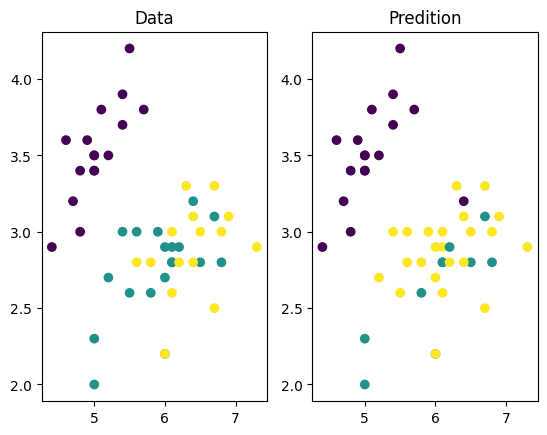

In [22]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax[0].set_title('Data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred)
ax[1].set_title('Predition')
plt.show()

## Стратегія "один проти одного"

![alt text](https://windmissing.github.io/images/2019/187.jpg)

Тепер обговоримо стратегію "всі проти всіх". Ми розглядаємо всі можливі пари класів та для того, щоб відрізнити клас **i** від класу **j** нам потрібно буде побудувати $C^2_n$ бінарних класифікаторів.
$$C^k_n = n!/(k!(n-k)!)$$
Наприклад для 4 класів
$$C^2_4 = 4!/(2!(4-2)!) = (1\cdot 2\cdot 3\cdot 4)/((1\cdot 2)(1\cdot 2)!)= 24/4 = 6 шт$$

Далі проводиться голосування та об'єкту присвоюється клас із найбільшою кількістю голосів. Формальніше клас об'єкта
**x** **у** випадку n класів можна визначити як
$$ a(x) = argmax_i \sum_{j=1}^{n}B_{ij} $$
$B_{ij}$ - матриця голосів

In [23]:
import numpy as np
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=0)

clf = OneVsOneClassifier(SGDClassifier()).fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

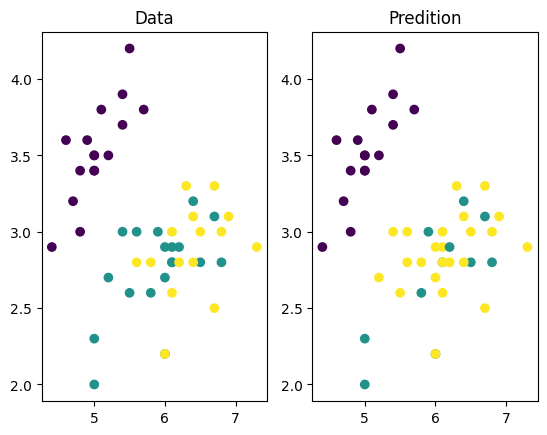

In [24]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax[0].set_title('Data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred)
ax[1].set_title('Predition')
plt.show()